## Import data and python packages

In [66]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [67]:
train_df = pd.read_csv('data/titanic/train.csv')
test_df = pd.read_csv('data/titanic/test.csv')

In [68]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
train_df.shape

(891, 12)

In [70]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
test_df.shape

(418, 11)

## Assess data quality & missing values

In [72]:
train_df.isnull().sum() / train_df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

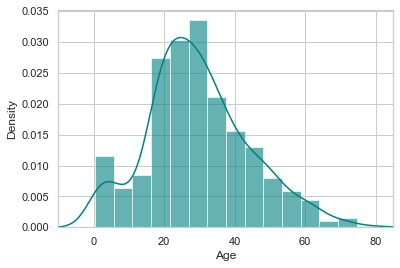

In [73]:
ax = train_df.Age.hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df.Age.plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

##### Decided to use median for filling null values instead of mean because 'Age' is right skewed

In [74]:
train_df.Age.fillna(train_df.Age.median(skipna=True), inplace=True)

##### There are so many missing values for 'Cabin' column so decided to ignore it

In [75]:
train_df.drop('Cabin', axis=1, inplace=True)

In [76]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##### Decided to fill missing values by choosing the port where most people boarded

In [77]:
train_df.Embarked.fillna(train_df.Embarked.value_counts().idxmax(), inplace=True)

##### Decided to add new features for preventing multicolinearity. Also added new features for categorical variables and droped useless features

In [78]:
train_df['TravelAlone'] = np.where((train_df.SibSp + train_df.Parch) > 0, 0, 1)
train_df.drop('SibSp', axis=1, inplace=True)
train_df.drop('Parch', axis=1, inplace=True)

In [80]:
training = pd.get_dummies(train_df, columns=['Pclass', 'Embarked', 'Sex'])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


### Applting the same changes to the test data

In [81]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

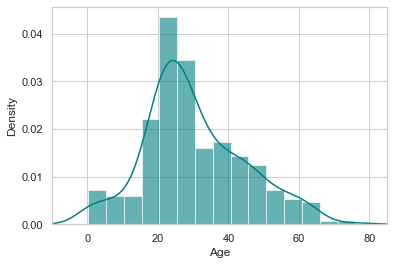

In [82]:
ax = test_df.Age.hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
test_df.Age.plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

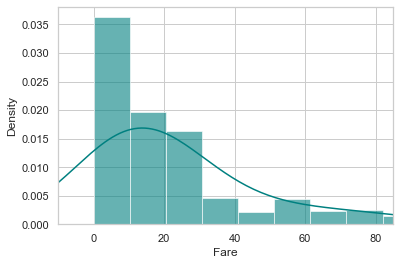

In [83]:
ax = test_df.Fare.hist(bins=50, density=True, stacked=True, color='teal', alpha=0.6)
test_df.Fare.plot(kind='density', color='teal')
ax.set(xlabel='Fare')
plt.xlim(-10, 85)
plt.show()

In [84]:
test_df.Age.fillna(test_df.Age.median(skipna=True), inplace=True)
test_df.Fare.fillna(test_df.Fare.median(skipna=True), inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)
test_df['TravelAlone']=np.where((test_df['SibSp'] + test_df['Parch']) > 0, 0, 1)

test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_df, columns=['Pclass', 'Embarked', 'Sex'])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


## Exploratory data analysis

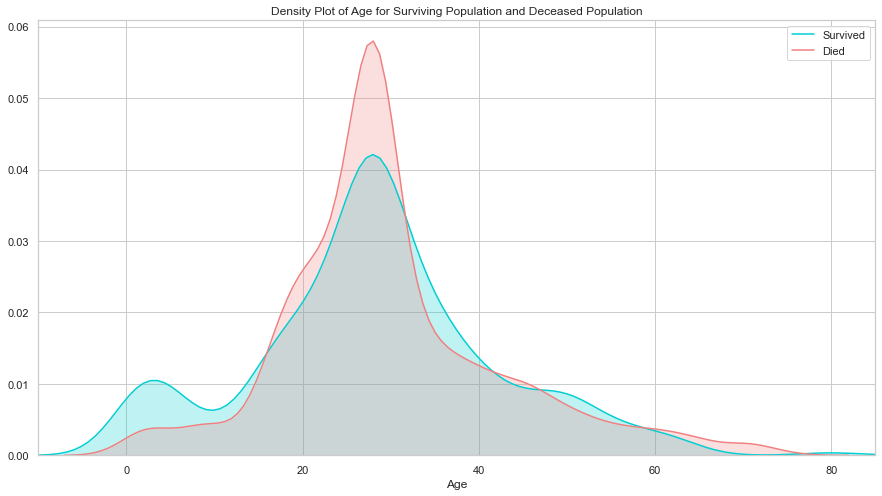

In [85]:
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(final_train['Age'][final_train.Survived == 1], color='darkturquoise', shade=True)
sns.kdeplot(final_train['Age'][final_train.Survived == 0], color='lightcoral', shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

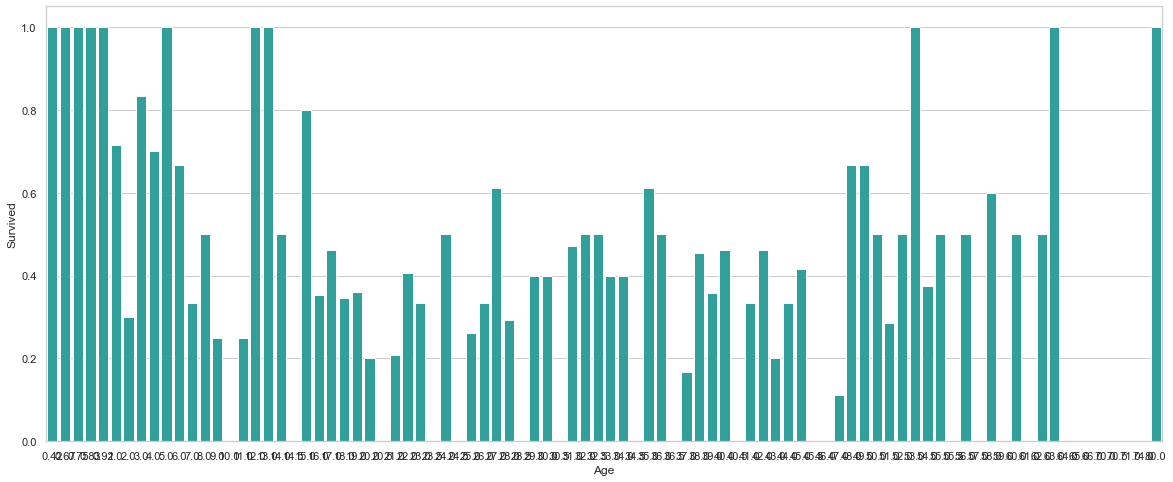

In [86]:
plt.figure(figsize=(20, 8))
avg_survival_byage = final_train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color='LightSeaGreen')
plt.show()

In [87]:
final_train['IsMinor'] = np.where(final_train['Age'] <= 16, 1, 0)
final_test['IsMinor'] = np.where(final_test['Age'] <= 16, 1, 0)

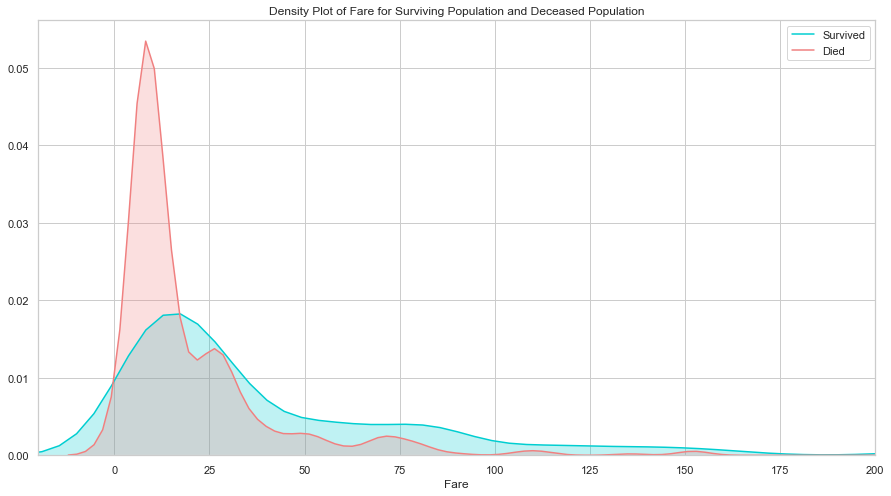

In [88]:
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(final_train['Fare'][final_train.Survived == 1], color='darkturquoise', shade=True)
sns.kdeplot(final_train['Fare'][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20, 200)
plt.show()

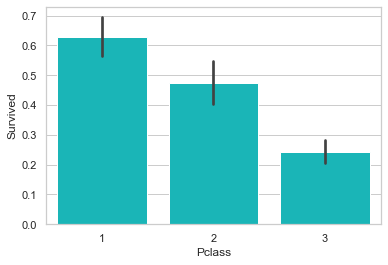

In [89]:
sns.barplot('Pclass', 'Survived', data=train_df, color='darkturquoise')
plt.show()

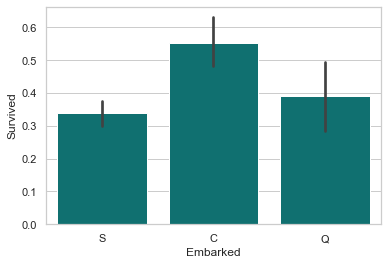

In [90]:
sns.barplot('Embarked', 'Survived', data=train_df, color='teal')
plt.show()

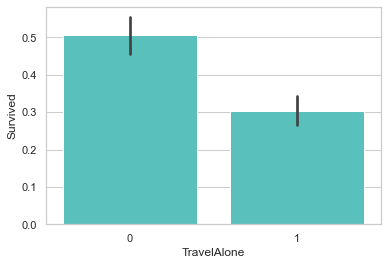

In [91]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color='mediumturquoise')
plt.show()

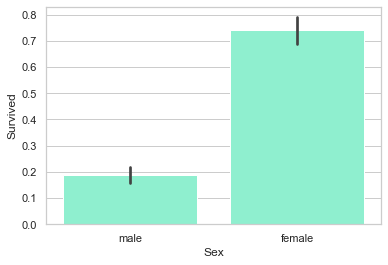

In [93]:
sns.barplot('Sex', 'Survived', data=train_df, color='aquamarine')
plt.show()

## Logistic Regression and results

### Feature selection

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
X = final_train[cols]
y = final_train['Survived']

model = LogisticRegression()
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)

list(X.columns[rfe.support_])

['Age',
 'TravelAlone',
 'Pclass_1',
 'Pclass_2',
 'Embarked_C',
 'Embarked_S',
 'Sex_male',
 'IsMinor']

Optimal number of features: 9
Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


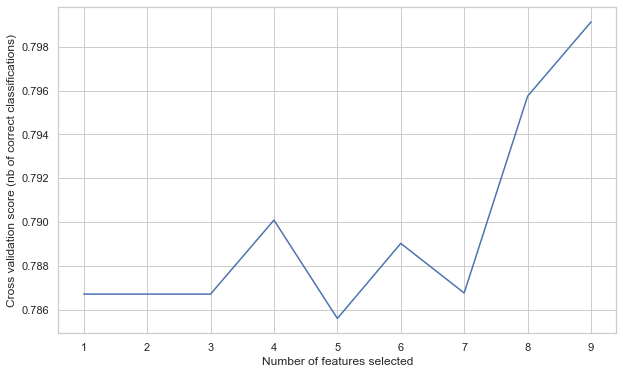

In [97]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10, 6))
plt.xlabel('Number of features selected')
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

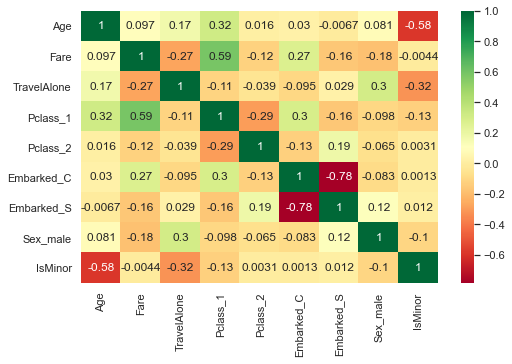

In [98]:
selected_features = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Review of model evaluation procedures

##### Model evaluation based on simple train/test split using train_test_split() function

LogisticRegression accuracy is 0.771
LogisticRegression log_loss is 0.506
LogisticRegression auc is 0.839


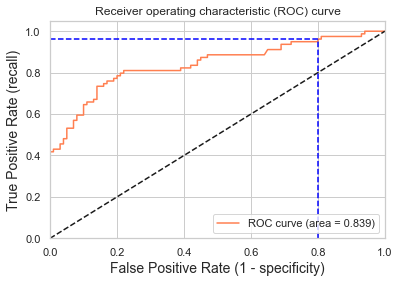

Using a threshold of 0.067 guarantees a sensitivity of 0.962 and a specificity of 0.200, i.e. a false positive rate of 80.00%.


In [99]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X = final_train[selected_features]
y = final_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

##### Model evaluation based on K-fold cross-validation using cross_val_score() function

In [100]:
logreg = LogisticRegression()
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.799
LogisticRegression average log_loss is 0.455
LogisticRegression average auc is 0.849


##### Model evaluation based on K-fold cross-validation using cross_validate() function

In [101]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.799 (+/-0.028)
LogisticRegression average log_loss: 0.455 (+/-0.037)
LogisticRegression average auc: 0.849 (+/-0.028)


### GridSearchCV evaluating using multiple scores simultaneously

### GridSearchCV evaluating using multiple scores, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously